# 04 OS Open Greenspace Spatial Distribution
---

Analysing the spatial distribution of OS Open Greenspace.

In [1]:
%pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [2]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Matplotlib created a temporary cache directory at /tmp/matplotlib-xw2l1ox0 because the default path (/home/rstudio-user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


###  Create GeoDataFrame from GeoPackage (GPKG)

In [3]:
# Create a GeoPandas GeoDataFrame from a GeoPackage (GPKG)
osogs = gpd.read_file(
    filename="../../data/ordnance-survey/os-open-greenspace-gb.gpkg",
    # GPKG layer
    layer="greenspace_site",
)

ERROR 1: PROJ: proj_create_from_database: Open of /cloud/lib/envs/training/share/proj failed


In [4]:
osogs.head()

id           function  \
0  0295ED12-FCD6-5C37-E063-AAEFA00A445E         Play Space   
1  0295ED00-FA59-5C37-E063-AAEFA00A445E  Religious Grounds   
2  0295ED69-4CAF-5C37-E063-AAEFA00A445E        Golf Course   
3  0295ECD4-44A8-5C37-E063-AAEFA00A445E      Playing Field   
4  0295ECF7-B076-5C37-E063-AAEFA00A445E         Play Space   

                distinctive_name_1 distinctive_name_2 distinctive_name_3  \
0                             None               None               None   
1  Grangemouth Gospel Trust Church               None               None   
2              Renfrew Golf Course               None               None   
3                             None               None               None   
4                             None               None               None   

  distinctive_name_4                                           geometry  
0               None  MULTIPOLYGON (((296898.000 668572.930, 296898....  
1               None  MULTIPOLYGON (((293715.730 679185.850, 293712....  
2               None  MULTIPOLYGON (((249732.430 668113.570, 249743....  
3               None  MULTIPOLYGON (((337165.470 951341.430, 337169....  
4               None  MULTIPOLYGON (((260972.210 666461.830, 260965....

### Plot GeoDataFrame

Visualising a dataset of relatively small MULTIPOLYGON geometries at a GB (small) scale can pose a challenge. If the data is plotted against a white background it can be difficult to interpret the spatial distribution.

Changing the geometry type of the dataset or increasing the contrast between the data overlay and the basemap can produce a clearer output. Deriving the centroid POINT geometry of each feature offers a solution as marker size adjustments can make features larger and clearer on the map.

The three example plots below explore different styles. Which do you think is most effective?

### Plot A

* No change to source MULTIPOLYGON geometry.
* White background.

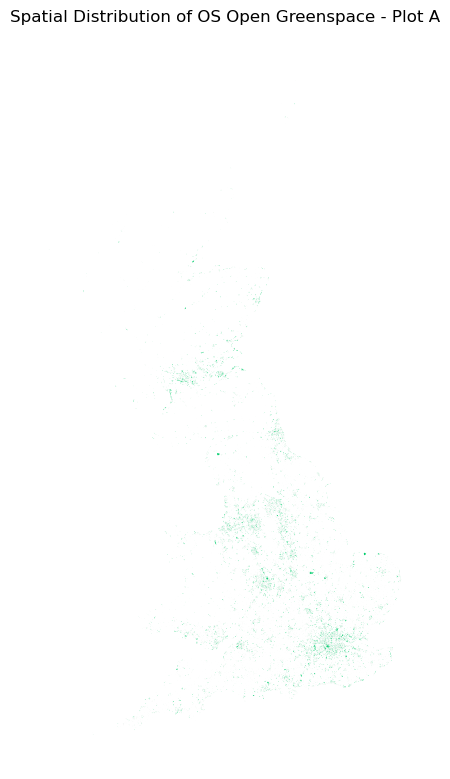

In [5]:
# Create figure and axes objects
f, ax = plt.subplots(figsize=(5, 10))

# Set title
ax.set_title("Spatial Distribution of OS Open Greenspace - Plot A")
# Turn axis off
ax.set_axis_off()

# Plot GeoDataFrame
osogs.plot(ax=ax, color="#00cd6c");

### Plot B 

* Source MULTIPOLYGON geometry converted to centroid POINT geometry.
* White background.
* Marker size and opacity can be flexed to accomodate feature density and distribution.

<Axes: title={'center': 'Spatial Distribution of OS Open Greenspace - Plot B'}>

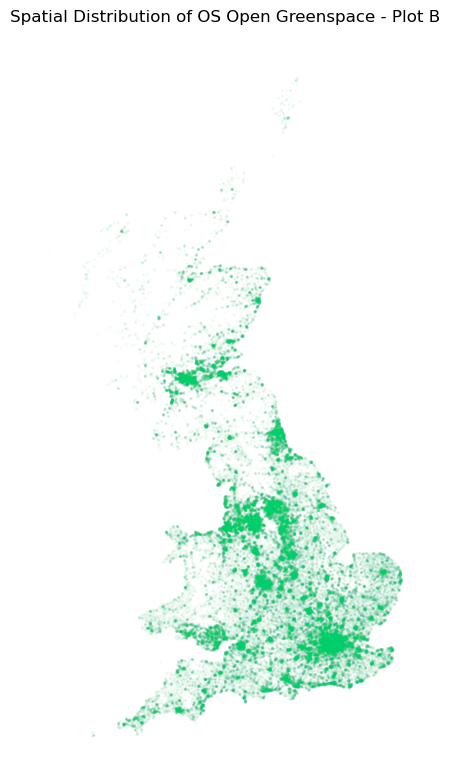

In [7]:
# Create figure and axes objects
f, ax = plt.subplots(figsize=(5, 10))

# Set title
ax.set_title("Spatial Distribution of OS Open Greenspace - Plot B")
# Turn axis off
ax.set_axis_off()

# Plot GeoDataFrame
osogs["geometry"].centroid.plot(ax=ax, color="#00cd6c05", markersize=1)

### Plot C

* Source MULTIPOLYGON geometry converted to centroid POINT geometry.
* Feature colour selected to contrast with background.
* Marker size and opacity can be flexed to accomodate feature density and distribution.

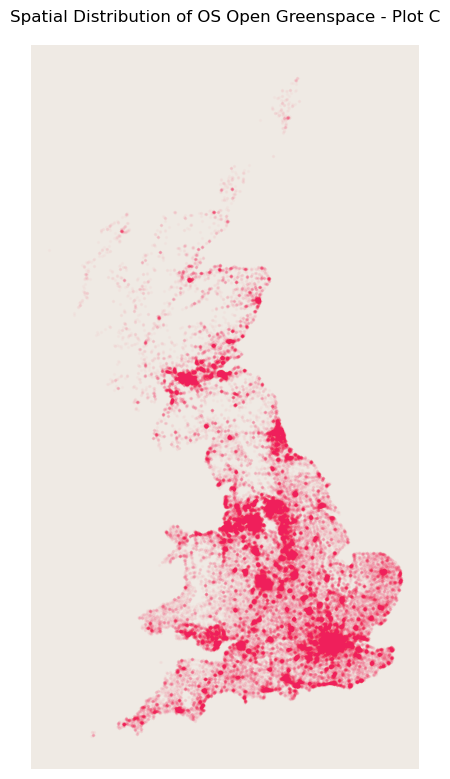

In [8]:
# Create figure and axes objects
f, ax = plt.subplots(figsize=(5, 10))

# Set title
ax.set_title("Spatial Distribution of OS Open Greenspace - Plot C")
# Turn axis off
ax.set_axis_off()
# Change background colour
ax.set_facecolor("#efeae4")

# Plot GeoDataFrame
osogs["geometry"].centroid.plot(ax=ax, color="#ff1f5b05", markersize=2)

# Re-add the background patch (turning the axis off removes the background)
ax.add_artist(ax.patch)
ax.patch.set_zorder(-1)

###  Spatially subset GeoDataFrame

Using coordinate-based indexer to spatially subset by bounding box (BBOX).

In [9]:
# Coordinate-based indexer to select by intersection with BBOX
# Greater London BBOX
osogs_filtered = osogs.cx[
    503568.1996:561957.4962, 155850.7975:200933.9026
]  # xmin:xmax, ymin:ymax

In [10]:
# Row count
osogs_filtered.shape[0]

12531

In [11]:
osogs.shape[0]

150415

### Add OS Maps API base map to GeoDataFrame plot

In [12]:
# OS Maps API layer name
# Example uses Light Style in Web Mercator (EPSG:3857) projection
layer = "Light_3857"
# OS Data Hub project API key
key = "frKhvBUiMB5DGwl3pGb2GzcOz6ApgyP0"

# OS Data Hub base path - https://api.os.uk
# OS Maps API ZXY end point path - /maps/raster/v1/zxy/
url = f"https://api.os.uk/maps/raster/v1/zxy/{layer}/{{z}}/{{x}}/{{y}}.png?key={key}"

### OS GeoDataViz colour palettes

The OS [GeoDataViz toolkik](https://github.com/OrdnanceSurvey/GeoDataViz-Toolkit/tree/master/Colours) provides qualitative, sequential, and diverging colour palettes to support GDV applications.

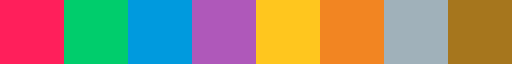

In [13]:
# OS GDV qualitative colour palette
colours = [
    "#FF1F5B",
    "#00CD6C",
    "#009ADE",
    "#AF58BA",
    "#FFC61E",
    "#F28522",
    "#A0B1BA",
    "#A6761D",
]

# Create matplotlib colour map from list
ListedColormap(colors=colours, name="os-gdv-qualitative")

In [14]:
len(colours)

8

### Plot subplots showing the spatial distribution by function

Visualise the spatial distribution of OS Open Greenspace features by function using subplots.

In [15]:
# Count number of unique function values
osogs_filtered["function"].nunique()

10

In [16]:
# Return unique function values in a list
# Subset function values to exclude 'Play Space' and 'Tennis Court'
functions = list(
    osogs_filtered.loc[
        ~(osogs_filtered["function"].isin(["Play Space", "Tennis Court"]))
    ]["function"].unique()
)

functions

['Allotments Or Community Growing Spaces',
 'Other Sports Facility',
 'Playing Field',
 'Public Park Or Garden',
 'Religious Grounds',
 'Bowling Green',
 'Cemetery',
 'Golf Course']

In [17]:
len(functions)

8

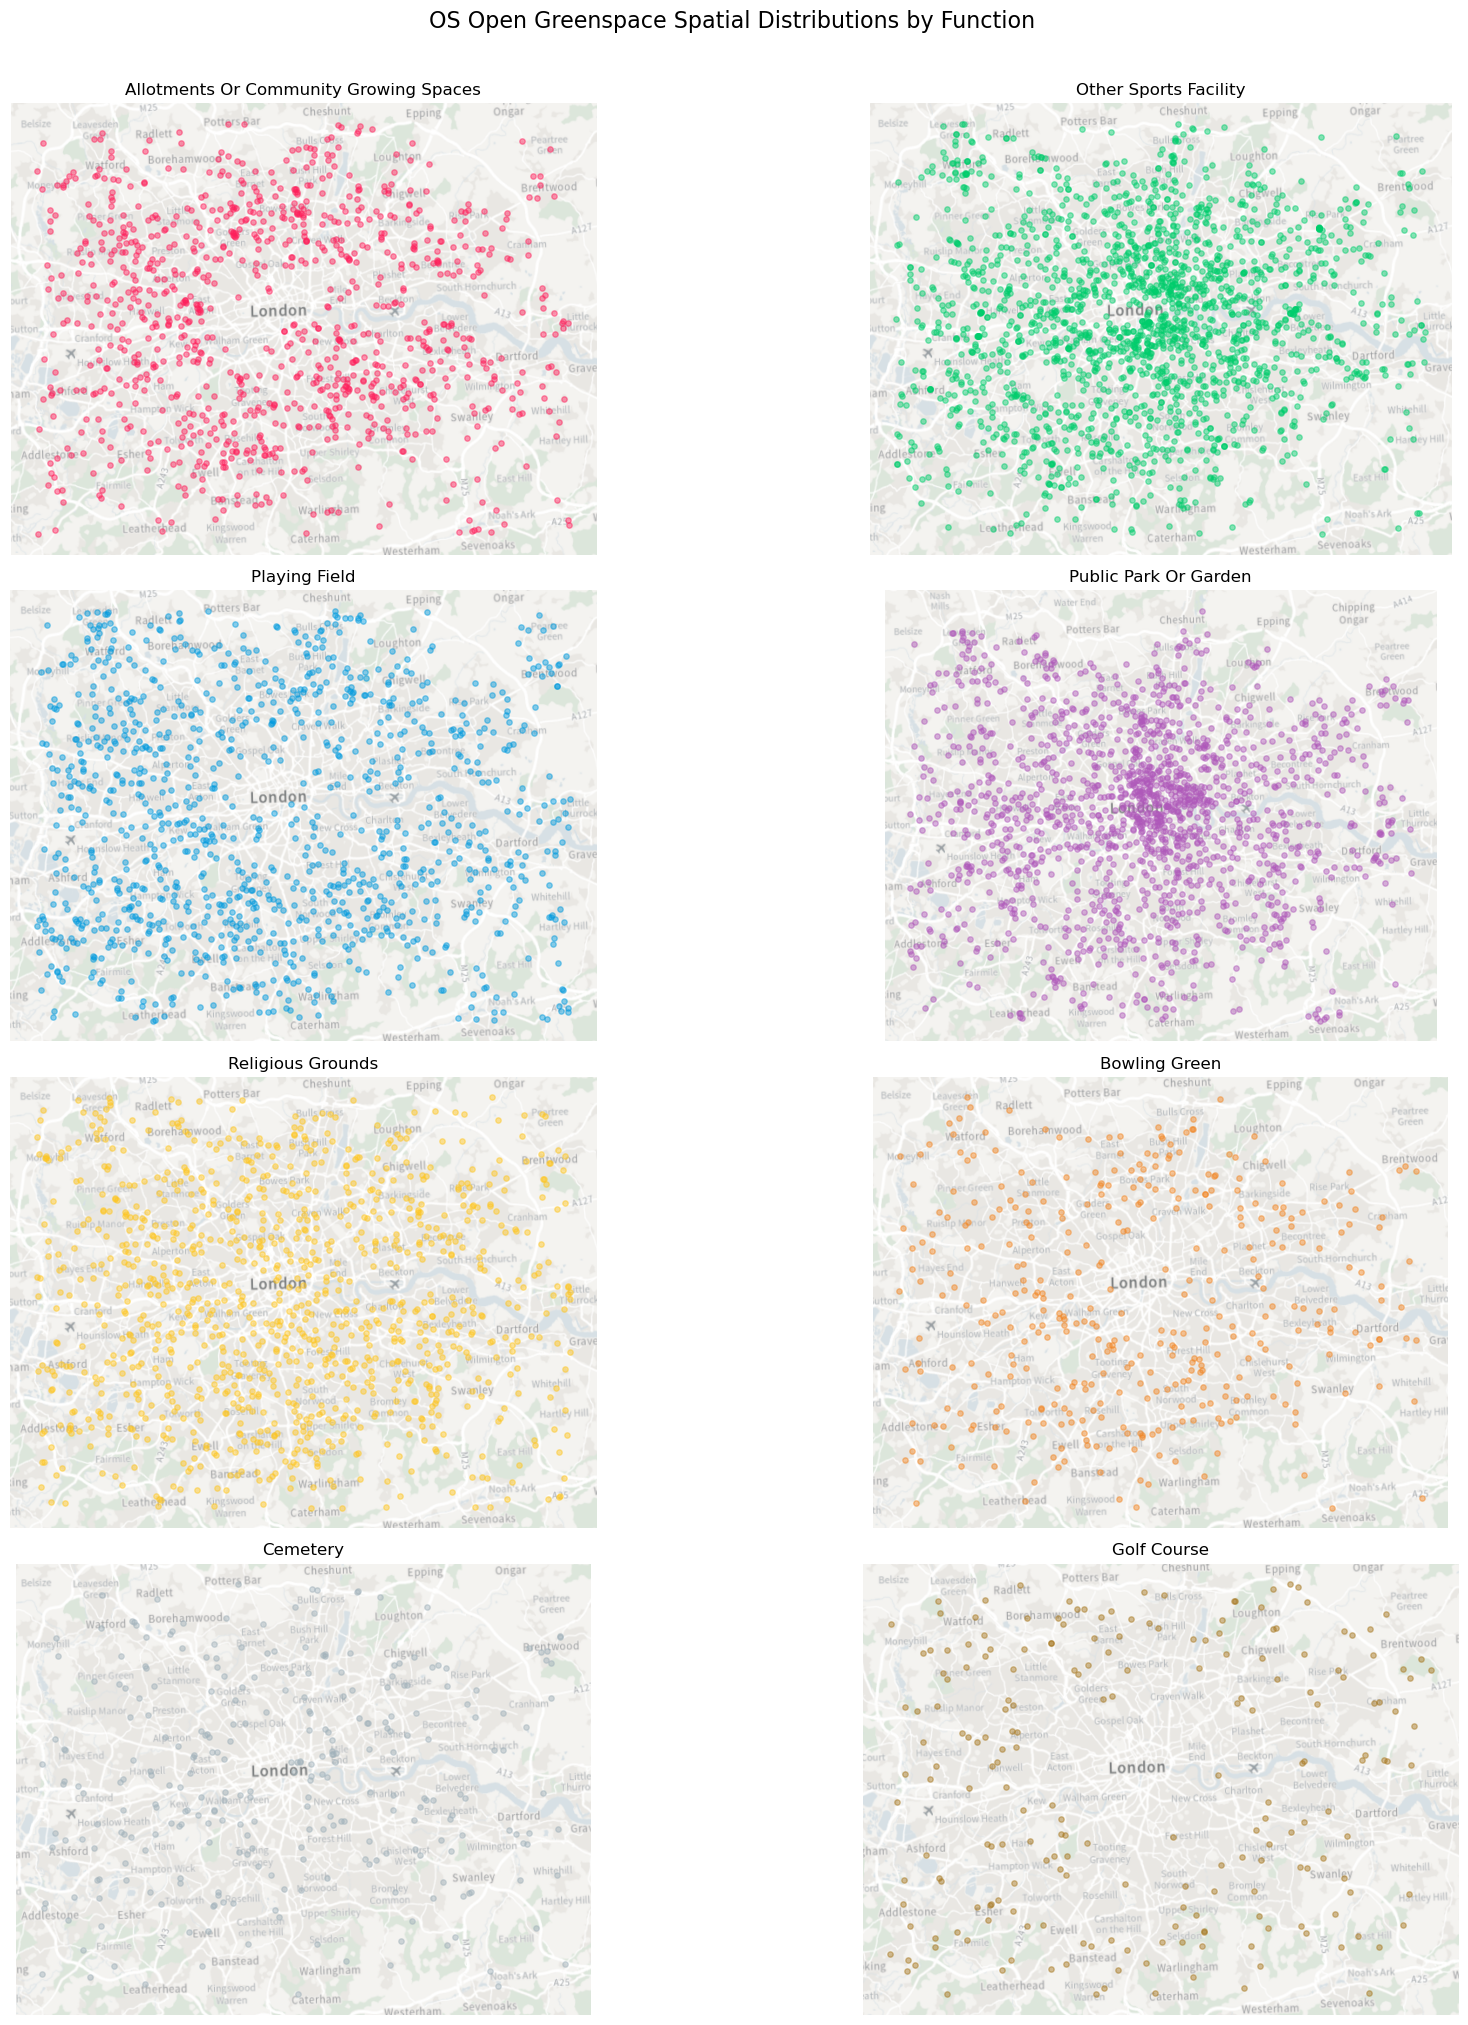

In [18]:
# Create figures and axes objects
f, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Set title
f.suptitle("OS Open Greenspace Spatial Distributions by Function", fontsize=16, y=1.01)

# Iterate over functions, colours, and axes
for function, colour, ax in zip(functions, colours, axs.flatten()):
    # Filter GeeoDataFrame by function
    osogs_filtered_function = osogs_filtered[osogs_filtered["function"] == function]

    # Set title
    ax.set_title(function)
    # Turn axis off
    ax.set_axis_off()

    # Plot GeoDataFrame
    osogs_filtered_function["geometry"].centroid.plot(
        ax=ax, color=f"{colour}75", markersize=15
    )
    # Add base map
    cx.add_basemap(
        ax,  # Matplotlib axes object
        source=url,  # OS Maps API
        crs=osogs_filtered_function.crs,
    )  # Base map CRS

plt.tight_layout()

In [19]:
# What are we iterating over?
list(zip(functions, colours, axs.flatten()))

[('Allotments Or Community Growing Spaces',
  '#FF1F5B',
  <Axes: title={'center': 'Allotments Or Community Growing Spaces'}>),
 ('Other Sports Facility',
  '#00CD6C',
  <Axes: title={'center': 'Other Sports Facility'}>),
 ('Playing Field', '#009ADE', <Axes: title={'center': 'Playing Field'}>),
 ('Public Park Or Garden',
  '#AF58BA',
  <Axes: title={'center': 'Public Park Or Garden'}>),
 ('Religious Grounds',
  '#FFC61E',
  <Axes: title={'center': 'Religious Grounds'}>),
 ('Bowling Green', '#F28522', <Axes: title={'center': 'Bowling Green'}>),
 ('Cemetery', '#A0B1BA', <Axes: title={'center': 'Cemetery'}>),
 ('Golf Course', '#A6761D', <Axes: title={'center': 'Golf Course'}>)]

In [20]:
print(axs.flatten())

[<Axes: title={'center': 'Allotments Or Community Growing Spaces'}>
 <Axes: title={'center': 'Other Sports Facility'}>
 <Axes: title={'center': 'Playing Field'}>
 <Axes: title={'center': 'Public Park Or Garden'}>
 <Axes: title={'center': 'Religious Grounds'}>
 <Axes: title={'center': 'Bowling Green'}>
 <Axes: title={'center': 'Cemetery'}>
 <Axes: title={'center': 'Golf Course'}>]


In [21]:
print(axs)

[[<Axes: title={'center': 'Allotments Or Community Growing Spaces'}>
  <Axes: title={'center': 'Other Sports Facility'}>]
 [<Axes: title={'center': 'Playing Field'}>
  <Axes: title={'center': 'Public Park Or Garden'}>]
 [<Axes: title={'center': 'Religious Grounds'}>
  <Axes: title={'center': 'Bowling Green'}>]
 [<Axes: title={'center': 'Cemetery'}>
  <Axes: title={'center': 'Golf Course'}>]]
